# Case Study: *Most desirable London boroughs to live in* <a id = 'Case_Study'></a>

## 1.1 Contents<a id = '1.1'></a>
* [Case Study](#Case_Study)
    * [1.1 Contents](#1.1)
    * [1.2 Objectives](#1.2)
    * [1.3 The Data Science Pipeline](#1.3)
        * [1.3.1. Sourcing and Loading](#1.3.1)
            * [1.3.1.1. Importing Libraries](#1.3.1.1)
            * [1.3.1.2.  Loading the data](#1.3.1.2)
        * [1.3.2. Cleaning, transforming, and visualizing](#1.3.2)
            * [1.3.2.1. Exploring data](#1.3.2.1)
            * [1.3.2.2. Cleaning & transforming the data](#1.3.2.2)
            * [1.3.2.3. Visualizing the data](#1.3.2.3)
        * [1.3.3. Modeling](#1.3.3)
        * [1.3.4. Conclusions](#1.3.4)

## 1.2 Objectives<a id = '1.2'></a>
This case study [<sup>1</sup>](#fn1) aims to find out *which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades.*

A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

## 1.3 The Data Science Pipeline<a id = '1.3'></a>

This Data Science project adheres to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 

### 1.3.1. Sourcing and Loading <a id = '1.3.1'></a>

#### 1.3.1.1. Importing Libraries<a id = '1.3.1.1'></a>

In [1]:
# Let's import the pandas library as pd 
import pandas as pd

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.3.1.2.  Loading the data<a id = '1.3.1.2'></a>
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# First, make a variable called url_LondonHousePrices with the url link:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 1.3.2. Cleaning, transforming, and visualizing<a id = '1.3.2'></a>
The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

#### 1.3.2.1. Exploring data<a id = '1.3.2.1'></a>

In [3]:
# Looking in to the data.

print("PRINTING PROPERTIES INFO: ")
print(properties.info())
print("\n")

print("PRINTING PROPERTIES HEAD: ")
print(properties.head())
print("\n")

# A quick look at the dataframe reveals that there are a total of 49 columns, unnamed columns, NaN values, 
# column0 are months, all other columns seem to be different boroughs
# row0 is different from the other rows and it looks like a unique ID/value for each column of borough. 
# the values for the columns seem to represent average home prices (monthly)

print("PRINTING PROPERTIES DESCRIBE: ")
print(properties.describe())
print("\n")
# There are three numerical columns (all unnamed columns)- 34, 37, 47 with NaN values. Need to drop these columns

print("PRINTING PROPERTIES SHAPE: ")
print(properties.shape)
print("\n")
# there are 316 rows and 49 columns

print("PRINTING PROPERTIES INDEX: ")
print(properties.index)
print("\n")
# index column is default integers (0,315)

print("PRINTING PROPERTIES COLUMNS: ")
print(properties.columns)
print("\n")
# unnamed: 0 represents months, all other 48 columns represents different boroughs (with columns 34, 37, 47 unnamed)

print("PRINTING PROPERTIES VALUEs: ")
print(properties.values)
# we can remove row0 or store it under ID when we transform the table- doesn't add extra value to our analysis.
# 1st column is of type Timestamp, all other columns have numerical values (float)

PRINTING PROPERTIES INFO: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            316 non-null    datetime64[ns]
 1   City of London        317 non-null    object        
 2   Barking & Dagenham    317 non-null    object        
 3   Barnet                317 non-null    object        
 4   Bexley                317 non-null    object        
 5   Brent                 317 non-null    object        
 6   Bromley               317 non-null    object        
 7   Camden                317 non-null    object        
 8   Croydon               317 non-null    object        
 9   Ealing                317 non-null    object        
 10  Enfield               317 non-null    object        
 11  Greenwich             317 non-null    object        
 12  Hackney               317 non-null    object       

#### 1.3.2.2. Cleaning & transforming the data<a id = '1.3.2.2'></a>

We need to clean-up the data by dropping columns/rows, renaming/formatting columns/indices, filling NaNs/NaTs, value manipulation, data type formatting and reshaping using melt. We transform the data so we have entries (monthly average house prices) as rows and boroughs as columns.

In [4]:
# drop 34, 37, 47 columns
properties.drop(properties.columns[[34, 37, 47]], axis = 1, inplace = True)
print(properties.columns)

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Inner London', 'Outer London', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS', 'WEST MIDLANDS',
       'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 'SOUTH WEST', 'England'],
      dtype='object')


In [5]:
print(properties.iloc[0])

Unnamed: 0                    NaT
City of London          E09000001
Barking & Dagenham      E09000002
Barnet                  E09000003
Bexley                  E09000004
Brent                   E09000005
Bromley                 E09000006
Camden                  E09000007
Croydon                 E09000008
Ealing                  E09000009
Enfield                 E09000010
Greenwich               E09000011
Hackney                 E09000012
Hammersmith & Fulham    E09000013
Haringey                E09000014
Harrow                  E09000015
Havering                E09000016
Hillingdon              E09000017
Hounslow                E09000018
Islington               E09000019
Kensington & Chelsea    E09000020
Kingston upon Thames    E09000021
Lambeth                 E09000022
Lewisham                E09000023
Merton                  E09000024
Newham                  E09000025
Redbridge               E09000026
Richmond upon Thames    E09000027
Southwark               E09000028
Sutton        

In [6]:
# rename column names to title style
properties.columns = [x.title() for x in properties.columns]
print(properties.columns)

Index(['Unnamed: 0', 'City Of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston Upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond Upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Inner London', 'Outer London', 'North East',
       'North West', 'Yorks & The Humber', 'East Midlands', 'West Midlands',
       'East Of England', 'London', 'South East', 'South West', 'England'],
      dtype='object')


In [7]:
# let's transpose the dataframe
properties = properties.transpose()
print(properties.head())

                          0                    1                    2    \
Unnamed: 0                NaT  1995-01-01 00:00:00  1995-02-01 00:00:00   
City Of London      E09000001          91448.98487          82202.77314   
Barking & Dagenham  E09000002           50460.2266          51085.77983   
Barnet              E09000003          93284.51832          93190.16963   
Bexley              E09000004          64958.09036          64787.92069   

                                    3                    4    \
Unnamed: 0          1995-03-01 00:00:00  1995-04-01 00:00:00   
City Of London              79120.70256          77101.20804   
Barking & Dagenham          51268.96956          53133.50526   
Barnet                      92247.52435          90762.87492   
Bexley                      64367.49344          64277.66881   

                                    5                    6    \
Unnamed: 0          1995-05-01 00:00:00  1995-06-01 00:00:00   
City Of London              84409.14

In [8]:
# check for all null values
properties.isna().sum().sort_values()
# only one null value 'NaT'- not a timestamp

158    0
214    0
213    0
212    0
211    0
      ..
102    0
101    0
100    0
107    0
0      1
Length: 317, dtype: int64

In [9]:
# fill NaT with id
properties.fillna('id', inplace=True)
print(properties.iloc[0,0])

id


In [10]:
# replace dates with only year and month
properties.iloc[0,1:] = [str(x.year)+'-'+str(x.month) for x in properties.iloc[0,1:]] 

# convert row0 to columns
properties.columns = properties.iloc[0]

# rename column axis to none
properties.rename_axis(None, axis=1, inplace=True)
print(properties.columns)

Index(['id', '1995-1', '1995-2', '1995-3', '1995-4', '1995-5', '1995-6',
       '1995-7', '1995-8', '1995-9',
       ...
       '2020-7', '2020-8', '2020-9', '2020-10', '2020-11', '2020-12', '2021-1',
       '2021-2', '2021-3', '2021-4'],
      dtype='object', length=317)


In [11]:
#drop rows with ids = ['E09000001' & starting with other than E09]
properties = properties[properties['id']!='E09000001']
print(properties.head())
properties = properties[properties['id'].str[0:3]=='E09'] # this also removes the first row
print(properties)

                           id       1995-1       1995-2       1995-3  \
Unnamed: 0                 id       1995-1       1995-2       1995-3   
Barking & Dagenham  E09000002   50460.2266  51085.77983  51268.96956   
Barnet              E09000003  93284.51832  93190.16963  92247.52435   
Bexley              E09000004  64958.09036  64787.92069  64367.49344   
Brent               E09000005  71306.56698  72022.26197  72015.76274   

                         1995-4       1995-5       1995-6       1995-7  \
Unnamed: 0               1995-4       1995-5       1995-6       1995-7   
Barking & Dagenham  53133.50526  53042.24852  53700.34831  52113.12157   
Barnet              90762.87492  90258.00033  90107.23471  91441.24768   
Bexley              64277.66881  63997.13588  64252.32335  63722.70055   
Brent               72965.63094  73704.04743  74310.48167  74127.03788   

                         1995-8       1995-9  ...       2020-7       2020-8  \
Unnamed: 0               1995-8       1995-

In [12]:
#check datatypes of each column
properties.dtypes

id         object
1995-1     object
1995-2     object
1995-3     object
1995-4     object
            ...  
2020-12    object
2021-1     object
2021-2     object
2021-3     object
2021-4     object
Length: 317, dtype: object

In [13]:
#change first column to str and others to float
properties.reset_index(inplace=True)
properties.rename(columns = {'index':'borough_name'}, inplace = True)
properties[['id','borough_name']] = properties[['id','borough_name']].astype('str')
properties.iloc[:,2:] = properties.iloc[:,2:].astype('float32')

#look at all the datatypes to make sure they are what we want
print(properties.dtypes) #still shows object

borough_name    object
id              object
1995-1          object
1995-2          object
1995-3          object
                 ...  
2020-12         object
2021-1          object
2021-2          object
2021-3          object
2021-4          object
Length: 318, dtype: object


In [14]:
print(type(properties.iloc[0,0])) # data is in str format
print(type(properties.iloc[0,1])) # data is in str format
print(type(properties.iloc[0,2])) # data is in float format

<class 'str'>
<class 'str'>
<class 'float'>


In [15]:
# melt to make further analysis easy
properties = properties.melt(id_vars=['borough_name','id'],value_vars=properties.columns[2:],var_name='month',value_name='avg_price')
properties.infer_objects()

,borough_name,id,month,avg_price
0,Barking & Dagenham,E09000002,1995-1,50460.226562
1,Barnet,E09000003,1995-1,93284.515625
2,Bexley,E09000004,1995-1,64958.089844
3,Brent,E09000005,1995-1,71306.570312
4,Bromley,E09000006,1995-1,81671.476562
...,...,...,...,...
10107,Sutton,E09000029,2021-4,402550.187500
10108,Tower Hamlets,E09000030,2021-4,473354.906250
10109,Waltham Forest,E09000031,2021-4,480235.281250
10110,Wandsworth,E09000032,2021-4,589904.312500


#### 1.3.2.3. Visualizing the data<a id = '1.3.2.3'></a>

To visualize the data, we do a line plot of Month against Average Price for a particular London Borough.

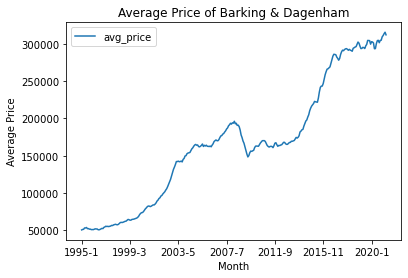

In [16]:
properties.query("id=='E09000002'").plot(x = 'month', y='avg_price' ,xlabel="Month", ylabel='Average Price', title = 'Average Price of {}'.format(properties['borough_name'][0]))
plt.show()

To limit the number of data points we have, we will extract the year from every month value of *Month* column. 

To this end, a ***lambda function*** is applied as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

In [17]:
# create a year column using lambda function
properties['year'] = properties.apply(lambda x: x['month'][:4], axis=1)
properties.infer_objects()

,borough_name,id,month,avg_price,year
0,Barking & Dagenham,E09000002,1995-1,50460.226562,1995
1,Barnet,E09000003,1995-1,93284.515625,1995
2,Bexley,E09000004,1995-1,64958.089844,1995
3,Brent,E09000005,1995-1,71306.570312,1995
4,Bromley,E09000006,1995-1,81671.476562,1995
...,...,...,...,...,...
10107,Sutton,E09000029,2021-4,402550.187500,2021
10108,Tower Hamlets,E09000030,2021-4,473354.906250,2021
10109,Waltham Forest,E09000031,2021-4,480235.281250,2021
10110,Wandsworth,E09000032,2021-4,589904.312500,2021


### 1.3.3. Modeling<a id = '1.3.3'></a>

We will calculate the ratio of average house prices (mean of monthly prices of a year) in 2018 and 1998 as follows:
1. get monthly house prices for years 1998 and 2018
2. groupby borough_name and year
3. take the mean so there is only one value for each year
4. reset_index since groupby changes the indices
5. pivot year (as columns) so that each year (1998, 2018) is represented as one column with avg_price values and index is borough_name
6. call lambda function which creates a ratio of two year columns 2018 and 1998

In [18]:
# avg_price is an object instead of float
properties['avg_price'] = properties['avg_price'].astype('float32') 

# calculate ratio of average house prices in 2018 and 1998 using a lambda function
properties_ratio = properties[properties.year.isin(['1998', '2018'])].groupby(['borough_name','year']). \
                        mean().reset_index().pivot(index = 'borough_name', columns='year', values='avg_price'). \
                        assign(ratio = lambda x: x.iloc[:, 1]/x.iloc[:,0])
properties_ratio.drop(properties_ratio.columns[[0,1]], inplace=True, axis=1)
properties_ratio.columns.name = None
properties_ratio

,ratio
borough_name,
Barking & Dagenham,4.896619
Barnet,4.358196
Bexley,4.248978
Brent,4.894554
Bromley,4.094785
Camden,4.935354
Croydon,4.201100
Ealing,4.311451
Enfield,4.263472


In [19]:
print(properties_ratio.sort_values('ratio', ascending=False))

                         ratio
borough_name                  
Hackney               6.198286
Waltham Forest        5.834755
Southwark             5.516485
Lewisham              5.449221
Westminster           5.353565
Newham                5.305390
Haringey              5.134624
Kensington & Chelsea  5.082465
Lambeth               4.957751
Camden                4.935354
Barking & Dagenham    4.896619
Brent                 4.894554
Islington             4.844048
Greenwich             4.763036
Wandsworth            4.757710
Merton                4.741273
Tower Hamlets         4.626701
Redbridge             4.471182
Barnet                4.358196
Havering              4.325231
Ealing                4.311451
Kingston Upon Thames  4.270550
Enfield               4.263472
Bexley                4.248978
Croydon               4.201100
Hillingdon            4.200273
Hammersmith & Fulham  4.137798
Sutton                4.118522
Bromley               4.094785
Harrow                4.059196
Richmond

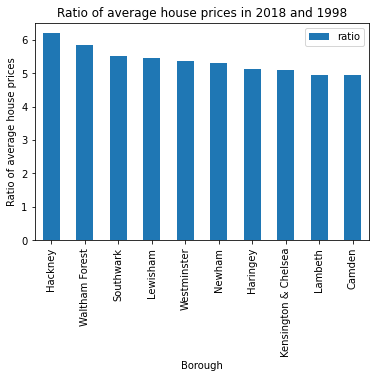

In [20]:
properties_ratio.sort_values('ratio', ascending=False)[:10].plot(xlabel='Borough', ylabel='Ratio of average house prices', title='Ratio of average house prices in 2018 and 1998', rot=90, kind='bar')
plt.show()

### 1.3.4. Conclusions<a id = '1.3.4'></a>

Hackney borough has the maximum ratio of avg_price_2018/avg_price_1998 of 6.198286, that's about a 520% increase in the price value. The second maximum increase in house price is Waltham Forest with about 483% increase. The lowest price increase is about 297% in Hounslow borough. So, Hackney is the most desirable borough with the highest price increase and Hounslow is the least desirable borough with the lowest price increase. 

[1]<span id="fn1"> originally written by Springboard Data Science team and modified by me </span>